# Probability Games using Simulations

## [Birthday Problem](https://en.wikipedia.org/wiki/Birthday_problem)

In [6]:
def birthdaySeries(l):
    retValue = []
    for x in l:
        retValue.append(birthdayProb(x))
    return np.array(retValue)
    
def birthdayProb(k):
    prob = 1
    for x in range(k):
        prob *= (365-x)/365
    return 1-prob

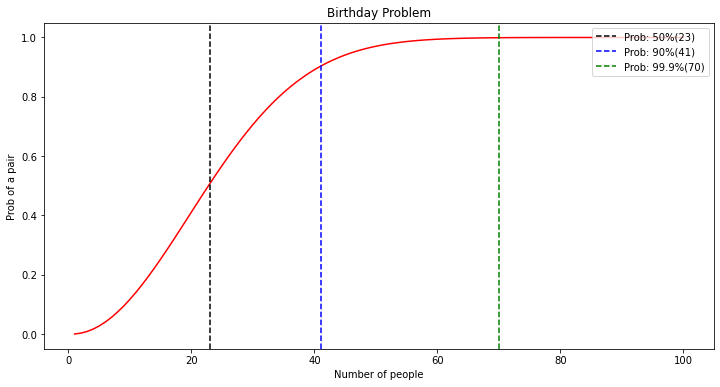

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.arange(1,101)

# the birthday function here
y = birthdaySeries(x)
    
# setting the plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')
# plot the lines 
xVal=np.argmax(y > 0.5)+1
plt.axvline(x=xVal, color='k', ls='--', label='Prob: 50%({})'.format(xVal))
xVal=np.argmax(y > 0.9)+1
plt.axvline(x=xVal, color='b', ls='--', label='Prob: 90%({})'.format(xVal))
xVal=np.argmax(y > 0.999)+1
plt.axvline(x=xVal, color='g', ls='--', label='Prob: 99.9%({})'.format(xVal))
# xVal=np.argmin(y < 1)+1
# plt.axvline(x=xVal, color='purple', ls='--', label='Prob: 100%({})'.format(xVal))

# place legend outside
plt.legend(loc='upper right')
plt.title('Birthday Problem')
plt.xlabel('Number of people')
plt.ylabel('Prob of a pair')

# show/save the plot
# plt.savefig('./images/birthdayProblem.png')
# plt.close()
plt.show()


## [Birthday Problem - Simulation](https://en.wikipedia.org/wiki/Birthday_problem)
- relation to Poisson distribution

## [Newton-Pepys Problem](https://en.wikipedia.org/wiki/Newton%E2%80%93Pepys_problem)

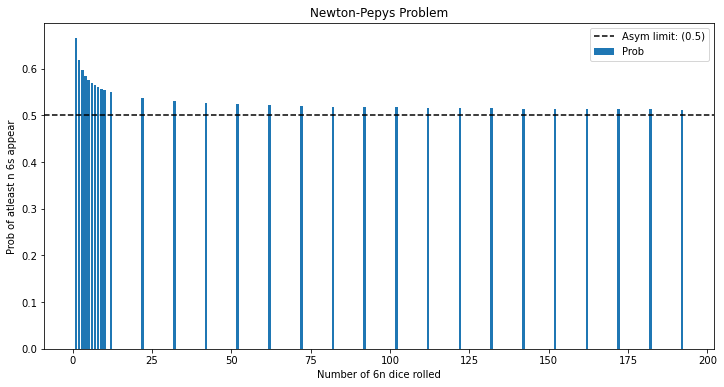

0.5122638879902388

In [8]:
from scipy.stats import binom
import matplotlib.pyplot as plt
from math import comb


def probSixDoesNotAppear(diceCount, minSixCount):
    prob = (5/6)**(diceCount)
    if minSixCount > 1:
        for i in range(1,minSixCount):
            prob += comb((6*minSixCount), i)*((5/6)**(diceCount-i))/(6**i)
            # Will lead into overflow
    return (1-prob)

# x = [i+1 for i in range(100)]
x1 = np.arange(10)+1
x2 = np.arange(11, 200, 10)+1
x = np.concatenate((x1, x2))
y = [probSixDoesNotAppear(6*i, i) for i in x]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.bar(x, y, label='Prob')

# plot the lines 
yVal=0.5
plt.axhline(y=yVal, color='k', ls='--', label='Asym limit: ({})'.format(yVal))

# place legend 
plt.legend(loc='upper right')
plt.title('Newton-Pepys Problem')
plt.xlabel('Number of 6n dice rolled')
plt.ylabel('Prob of atleast n 6s appear')

# show/save the plot
# plt.savefig('./images/newtonPepysProblem.png')
# plt.close()
plt.show()

y[-1]

## Taylor series for e

In [9]:
# valueOfE = 1
# x = np.arange(1,21)
# # y1 = ((-1)**x)/factorial(x)
# y1 = []
# for i in x:
#     valueOfE += ((-1)**i)/factorial(i)
#     y1.append(valueOfE) 
# y = np.array(y1)
# #     print((i, valueOfE, 1/exp(1)))
    
# # setting the plot
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# # plot the function
# plt.plot(x,y, 'r')

## de Montmort's Matching Problem

## de Montmort's Matching Problem - Simulation

0.63405


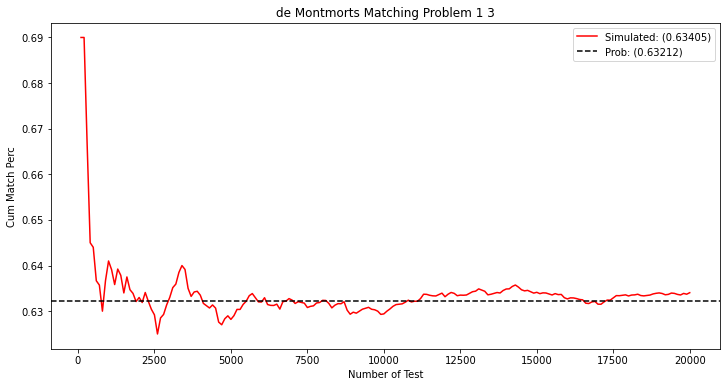

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp

noOfDoorsHostOpens = 1
doorsCt = 3

def deMontmortMatchingProblem(minMatchCount = 1):
    n = 100 # Range 1 to n
    k = 100 # Sample size
    runs = 20000

    # np.random.seed(5)

    runResult = []
    index = np.arange(k)
    for _ in range(runs):
        sampled = np.random.choice(k, n, replace=False)
        runResult.append(sum(sampled == index))
    runResultArr = np.array(runResult)
    finalResult = sum(runResultArr >= minMatchCount)/runs
    print(finalResult)

    stepSize = 100
    x = np.arange(stepSize, runs+stepSize, stepSize)
    y1 = []
    for i in x:
        subArr = runResultArr[:i]
        y1.append(sum(subArr >= minMatchCount)/i)
    y = np.array(y1)

    # setting the plot
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1)
    # plot the function
    plt.plot(x,y, 'r', label='Simulated: ({})'.format(finalResult))

    # plot the lines 
    yVal=round(1-(1/exp(1)), 5)
    plt.axhline(y=yVal, color='k', ls='--', label='Prob: ({})'.format(yVal))

    # place legend 
    plt.legend(loc='upper right')
    plt.title('de Montmorts Matching Problem {} {}'.format(
        noOfDoorsHostOpens, doorsCt))
    plt.xlabel('Number of Test')
    plt.ylabel('Cum Match Perc')

    # show/save the plot
#     plt.savefig('./images/deMontmortMatching.png')
#     plt.close()
    plt.show();

deMontmortMatchingProblem()

## [Monty Hall Problem - Host opens p of n doors - Simulation](https://en.wikipedia.org/wiki/Monty_Hall_problem#N_doors)

Monty Hall win percentage when host opens 1 of 3 doors and player switches door = 0.6572


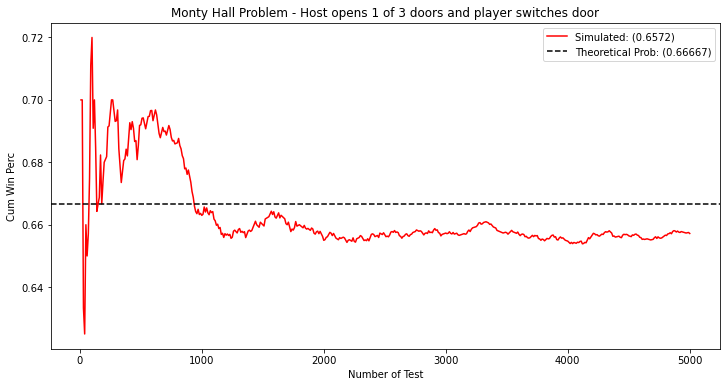

Monty Hall win percentage when host opens 1 of 3 doors and player does not switch door = 0.3396


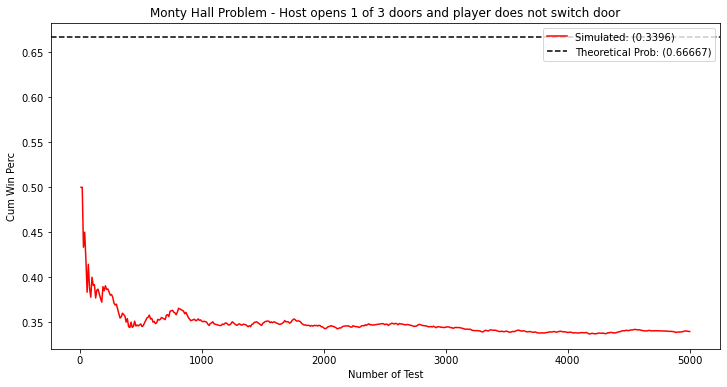

Monty Hall win percentage when host opens 2 of 4 doors and player switches door = 0.7528


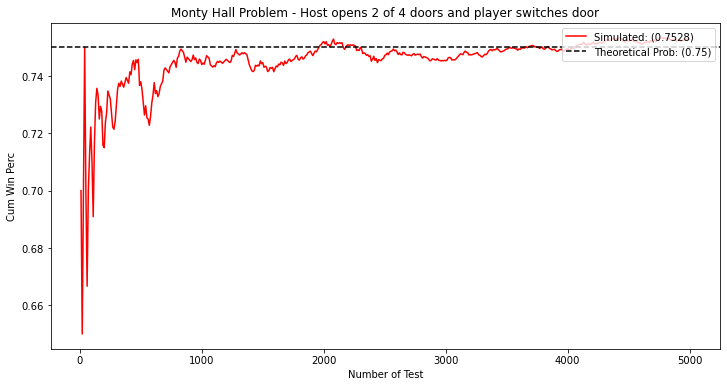

Monty Hall win percentage when host opens 2 of 4 doors and player does not switch door = 0.2544


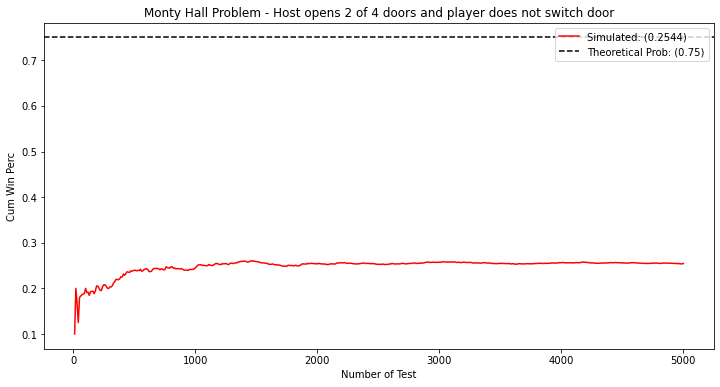

Monty Hall win percentage when host opens 1 of 4 doors and player switches door = 0.3712


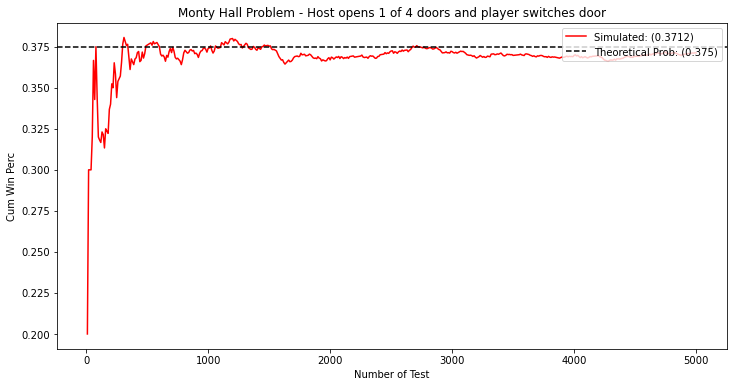

Monty Hall win percentage when host opens 8 of 10 doors and player switches door = 0.9008


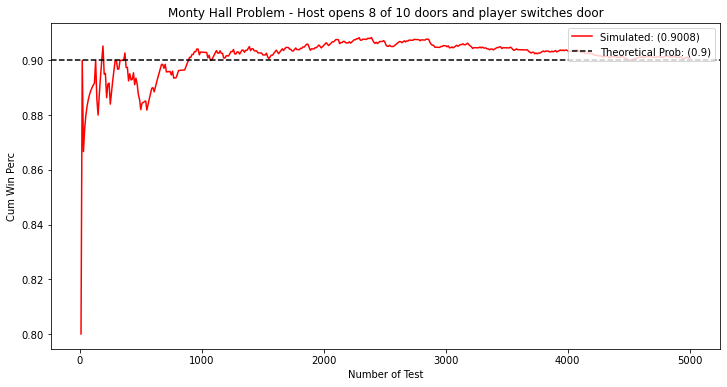

Monty Hall win percentage when host opens 3 of 10 doors and player switches door = 0.1584


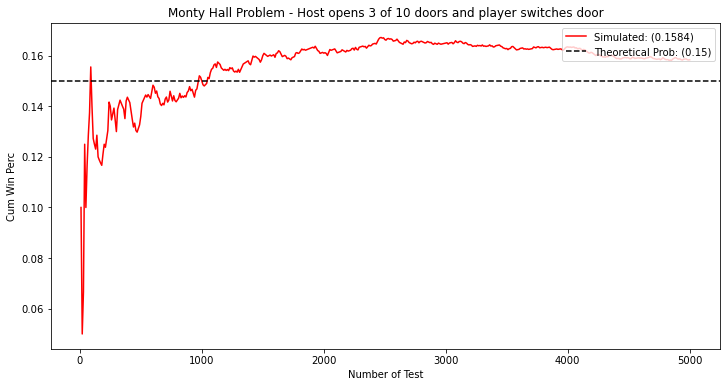

Monty Hall win percentage when host opens 3 of 10 doors and player does not switch door = 0.0958


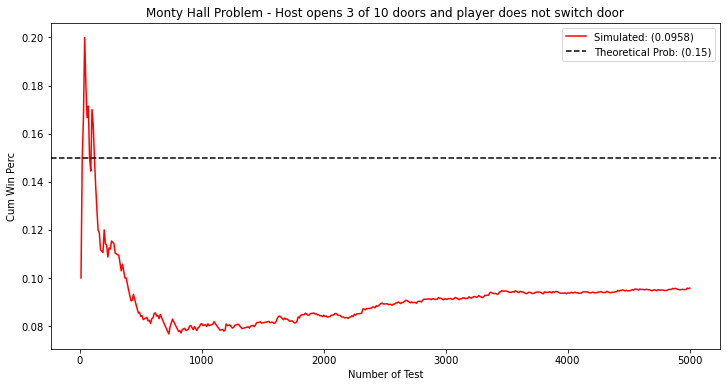

Monty Hall win percentage when host opens 98 of 100 doors and player switches door = 0.9914


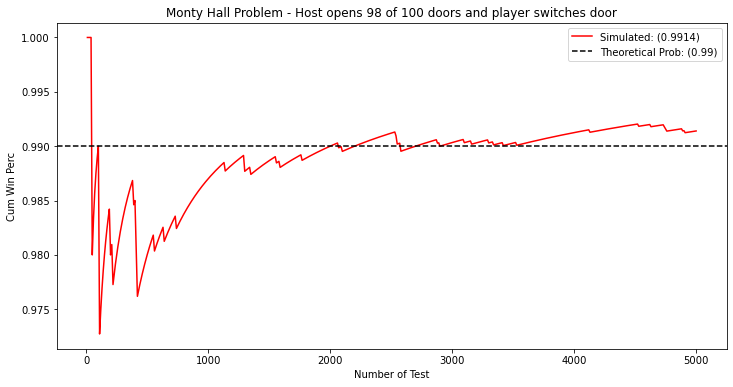

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ordered_set import OrderedSet

def montyHallProblem(switch, doorsCt, noOfDoorsHostOpens, noOfRuns):
    winSwitchCt = 0
    winNoSwitchCt = 0
    loseSwitchCt = 0
    loseNoSwitchCt = 0
    doors = range(doorsCt)

    # Randomly choose the door with car behind
    doorWithCar = np.random.randint(0, doorsCt)  
    # Host knows where the car is
    host = doorWithCar  
    # Player randomly chooses a door
    playerChoice = np.random.randint(0, doorsCt)
    # This was players original choice
    originalPlayerChoice = playerChoice
    # Host opens door which neither player chose nor which has car behind
#     openedDoor = switchFunction(host, doorsCt, playerChoice)
    hostOpenedDoorsList = switchFunction2([host], doorsCt, playerChoice, 
                                          noOfDoorsOpenRequest=noOfDoorsHostOpens)
    if switch == True:
        # If player decides to switch
#         playerChoice = switchFunction(openedDoor, doorsCt, playerChoice)
        playerChoice = switchFunction2(hostOpenedDoorsList, doorsCt, playerChoice, 
                                       noOfDoorsOpenRequest=1)[0]

    if playerChoice == host and switch == False:
        # Player wins from not switching
        winNoSwitchCt += 1
    elif playerChoice == host and switch == True:
        # Player wins from switching
        winSwitchCt += 1
    elif playerChoice != host and switch == False:
        # Player lost from not switching
        loseNoSwitchCt += 1
    elif playerChoice != host and switch == True:
        # Player lost from switching
        loseSwitchCt += 1
    
    if switch:
        return winSwitchCt
    else:
        return winNoSwitchCt
#     return winNoSwitchCt, winSwitchCt, loseNoSwitchCt, loseSwitchCt


# Let the player switch to another unopened door - first version
def switchFunction(openedDoor, doorsCt, playerChoice):
    nextPick = np.random.choice(doorsCt, 1, replace=False)
    while(nextPick in [openedDoor, playerChoice]):
        nextPick = np.random.choice(doorsCt, 1, replace=False)
    return nextPick


def switchFunction2(openedDoorsList, doorsCt, playerChoice, noOfDoorsOpenRequest=1):
    '''
    This function takes a list of opened or known doors and returns a list of new 
    unopened doors ready to be opened. This new return list will not include known 
    input door or players choice door.
    The count of return door list will match the requested doors to open
        Parameters:
            openedDoorsList (list)    : A list of known/opened doors
            doorsCt (int)             : Number of doors count
            playerChoice (int)        : Players choice door
            noOfDoorsOpenRequest (int): (default 1) number of doors requested to open

        Returns:
            returnDoorsList (list)    : List of unopened door
    '''
    doorsLst = []
    assert doorsCt >= noOfDoorsOpenRequest + len(openedDoorsList) + 1
    doorsLst.extend(openedDoorsList)
    doorsLst.append(playerChoice)
    
    nextRandomPickList = np.random.choice(doorsCt, doorsCt, replace=False)
    nextRandomPickSet = OrderedSet(nextRandomPickList)
    openedSet = OrderedSet(doorsLst)
    newUnopenedList = list(nextRandomPickSet - openedSet)[:noOfDoorsOpenRequest]
    return newUnopenedList

def plotMontyHallProblem(doorsCt, noOfDoorsHostOpens, noOfRuns, saveNameLocation=None, switch=True):
    x = []
    y = []
    x1 = []
    y1 = []

    plotEveryTenth = 10
    winCt = []

    for i in range(1, noOfRuns):
        x.append(i)
        retValue = montyHallProblem(switch, doorsCt, noOfDoorsHostOpens, noOfRuns)
        winCt.append(retValue)
        y.append(sum(winCt[:i]) / i)

        if i % plotEveryTenth == 0:
            x1.append(i)
            y1.append(sum(winCt[:i]) / i)

    if switch:
        switchStr = 'switches door'
    else:
        switchStr = 'does not switch door'
    print(f'Monty Hall win percentage when host opens {noOfDoorsHostOpens} '+
          f'of {doorsCt} doors and player {switchStr} = {y[-1]}')

    # Plot the simulation
    plt.figure(figsize=(12, 6))  
    plt.plot(x1, y1, 'r', label='Simulated: ({})'.format(y[-1]))

    # Theoretical formula for switch door
    # Theoretical formula for no switch door - MISSING (INCORRECT)
    yVal=round((1/doorsCt)*(doorsCt-1)/(doorsCt-noOfDoorsHostOpens-1), 5)
    # plot the calculated line     
    plt.axhline(y=yVal, color='k', ls='--', label='Theoretical Prob: ({})'.format(yVal))

    # Place legend 
    plt.legend(loc='upper right')

    plt.title('Monty Hall Problem - Host opens {} of {} doors and player {}'.format(
        noOfDoorsHostOpens, doorsCt, switchStr))
    plt.xlabel('Number of Test')
    plt.ylabel('Cum Win Perc')
    if saveNameLocation:
        plt.savefig(saveNameLocation)
        plt.close()
    else:
        plt.show()


plotMontyHallProblem(doorsCt=3, noOfDoorsHostOpens=1, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem3_1.png')
plotMontyHallProblem(doorsCt=3, noOfDoorsHostOpens=1, noOfRuns=5001, saveNameLocation=False,
#                      saveNameLocation='./images/montyHallProblem3_1_NoSwitch.png',
                     switch=False)
plotMontyHallProblem(doorsCt=4, noOfDoorsHostOpens=2, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem4_2.png')
plotMontyHallProblem(doorsCt=4, noOfDoorsHostOpens=2, noOfRuns=5001, saveNameLocation=False,
#                      saveNameLocation='./images/montyHallProblem4_2_NoSwitch.png',
                     switch=False)
plotMontyHallProblem(doorsCt=4, noOfDoorsHostOpens=1, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem4_1.png')
plotMontyHallProblem(doorsCt=10, noOfDoorsHostOpens=8, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem10_8.png')
plotMontyHallProblem(doorsCt=10, noOfDoorsHostOpens=3, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem10_3.png')
plotMontyHallProblem(doorsCt=10, noOfDoorsHostOpens=3, noOfRuns=5001, saveNameLocation=False,
#                      saveNameLocation='./images/montyHallProblem10_3_NoSwitch.png',
                     switch=False)
plotMontyHallProblem(doorsCt=100, noOfDoorsHostOpens=98, noOfRuns=5001, saveNameLocation=False)
#                      saveNameLocation='./images/montyHallProblem100_98.png')

## Gambler's Ruin
- until it reaches absorbing boundary of 0 or N
- 

## Prosecutor's fallacy

## Simpson's paradox
- https://plato.stanford.edu/entries/paradox-simpson/

## TODO Next

- https://en.wikipedia.org/wiki/Category:Probability_problems
- https://en.wikipedia.org/wiki/Category:Mathematical_problems
- https://en.wikipedia.org/wiki/Category:Probability_theory_paradoxes


- [Balls into bins problem](https://en.wikipedia.org/wiki/Balls_into_bins_problem)
  - The problem involves m balls and n boxes (or "bins"). Each time, a single ball is placed into one of the bins. After all balls are in the bins, we look at the number of balls in each bin; we call this number the load on the bin and ask: what is the maximum load on a single bin?
- Banach's matchbox problem
- Bertrand's ballot theorem
- Bertrand's box paradox
- Birthday problem
- Boy or Girl paradox
- Buffon's needle problem
- Coupon collector's problem
- Gambler's ruin
- German tank problem
- Hamburger moment problem
- Hausdorff moment problem
- Littlewood–Offord problem
- Mabinogion sheep problem
- Moment problem
- Monty Hall problem
- Newton–Pepys problem
- Pill puzzle
- Problem of points
- Secretary problem
- Siegel's paradox
- Sleeping Beauty problem
- Stieltjes moment problem
- [St Petersburg paradox](https://plato.stanford.edu/entries/paradox-stpetersburg/) 
  -  A fair coin is flipped until it comes up heads the first time. At that point the player wins $2^n$, where n is the number of times the coin was flipped. How much should one be willing to pay for playing this game?
- Sunrise problem
- Three Prisoners problem
- Trigonometric moment problem
- Two envelopes problem
- Urn problem
- Waldegrave problem